# 1. Import Libraries

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

# 2. Import DataSet

In [120]:
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Columns 1 is nothing but serial number for each region. Hence we can drop it

# 3. Exploratory Data Analysis

In [121]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In the above table:<br>
PLU 4046 - Small/Medium Hass Avocado<br>
PLU 4225 - Large Hass Avocado<br>
PLU 4770 - Extra Large Hass Avocado<br><br>
Hence we will rename the column with new name for better identification and working.

In [122]:
df=df.rename(columns={'4046':'Small/Medium', '4225':'Large', '4770':'XL'})
df

,Date,AveragePrice,Total Volume,Small/Medium,Large,XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [123]:
df.head(10)

,Date,AveragePrice,Total Volume,Small/Medium,Large,XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


Top 10 rows of the data is showed

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   Small/Medium  18249 non-null  float64
 4   Large         18249 non-null  float64
 5   XL            18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Summary:<br>
Rows : 18249<br>
Columns : 13<br>
Non Null Rows : Entire table is non null<br>
Float Type : 9<br>
int64 Type : 1<br>
object Type : 3

In [125]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
Small/Medium    0
Large           0
XL              0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No Null values present

In [126]:
#checking number of unique values and converting into dataframe
df.nunique().to_frame("No.of unique values")

,No.of unique values
Date,169
AveragePrice,259
Total Volume,18237
Small/Medium,17702
Large,18103
XL,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588


Unique Values:<br>
type : 2 <br>
year : 4 <br>
region : 54<br>

In [127]:
#Unique values in type
df['type'].unique().tolist()

['conventional', 'organic']

In [128]:
#Unique values in year
df['year'].unique().tolist()

[2015, 2016, 2017, 2018]

In [129]:
#Unique values in region
df['region'].unique().tolist()

['Albany',
 'Atlanta',
 'BaltimoreWashington',
 'Boise',
 'Boston',
 'BuffaloRochester',
 'California',
 'Charlotte',
 'Chicago',
 'CincinnatiDayton',
 'Columbus',
 'DallasFtWorth',
 'Denver',
 'Detroit',
 'GrandRapids',
 'GreatLakes',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'LasVegas',
 'LosAngeles',
 'Louisville',
 'MiamiFtLauderdale',
 'Midsouth',
 'Nashville',
 'NewOrleansMobile',
 'NewYork',
 'Northeast',
 'NorthernNewEngland',
 'Orlando',
 'Philadelphia',
 'PhoenixTucson',
 'Pittsburgh',
 'Plains',
 'Portland',
 'RaleighGreensboro',
 'RichmondNorfolk',
 'Roanoke',
 'Sacramento',
 'SanDiego',
 'SanFrancisco',
 'Seattle',
 'SouthCarolina',
 'SouthCentral',
 'Southeast',
 'Spokane',
 'StLouis',
 'Syracuse',
 'Tampa',
 'TotalUS',
 'West',
 'WestTexNewMexico']

In [130]:
#We will check unique value and the occurence of unique values in the columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: Small/Medium, Length: 17702, dtype: int64


0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30    

No Blank values present<br>
1. Low Avg Price has high frequency means, the unique values has more entries around same average price.<br>
2. 0.00 in the Small/Medium, Large and XL columns indicates that for any particular entry, a particular size of Avocado is not present. It is not treated as missing value.<br>
3. 0.00 in the Small/Medium, Large and XL columns indicates that for any particular entry, a particular size of Avocado is not present. It is not treated as missing value.<br>
4. We see almost equal amount of entries for 2015, 2016 and increase in 2017 and data for 2018 is not complete, since we are fetching data from this particular year only.<br>
5. We have Equal no of data from all Region i.e. 338, except for WestTexNewMexico which has only 335 data<br>

# 4. Description of Dataset

In [131]:
help(df.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None, datetime_is_numeric: 'bool_t' = False) -> 'NDFrameT' method of pandas.core.frame.DataFrame instance
    Generate descriptive statistics.
    
    Descriptive statistics include those that summarize the central
    tendency, dispersion and shape of a
    dataset's distribution, excluding ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of 

In [132]:
df.describe(include='all')

,Date,AveragePrice,Total Volume,Small/Medium,Large,XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Albany
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


Summary :<br><br>
1. Column 'type' : 2 unique values<br>
2. Column 'region' : 54 unique values<br><br>
For Numerical Columns:<br><br>
1. Mean > Median : AveragePrice, Total Volume, Large, XL, Large Bags, XLarge Bags <br>
2. Mean < Median : Small/Medium, Total Bags, Small Bags <br>
3. Large Difference between 75% and max : Large Bags<br>

75% of XL column, Small Bags,  is bigger than max value.

# 5. Encoding of Non Numerical Columns

In [133]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [134]:
df

,Date,AveragePrice,Total Volume,Small/Medium,Large,XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [135]:
LE=LabelEncoder()
list1=['type','region']
for i in list1:
    df[i]=LE.fit_transform(df[i])
df

,Date,AveragePrice,Total Volume,Small/Medium,Large,XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


# 6.Data Visualization

## 6.1 Univariate Analysis

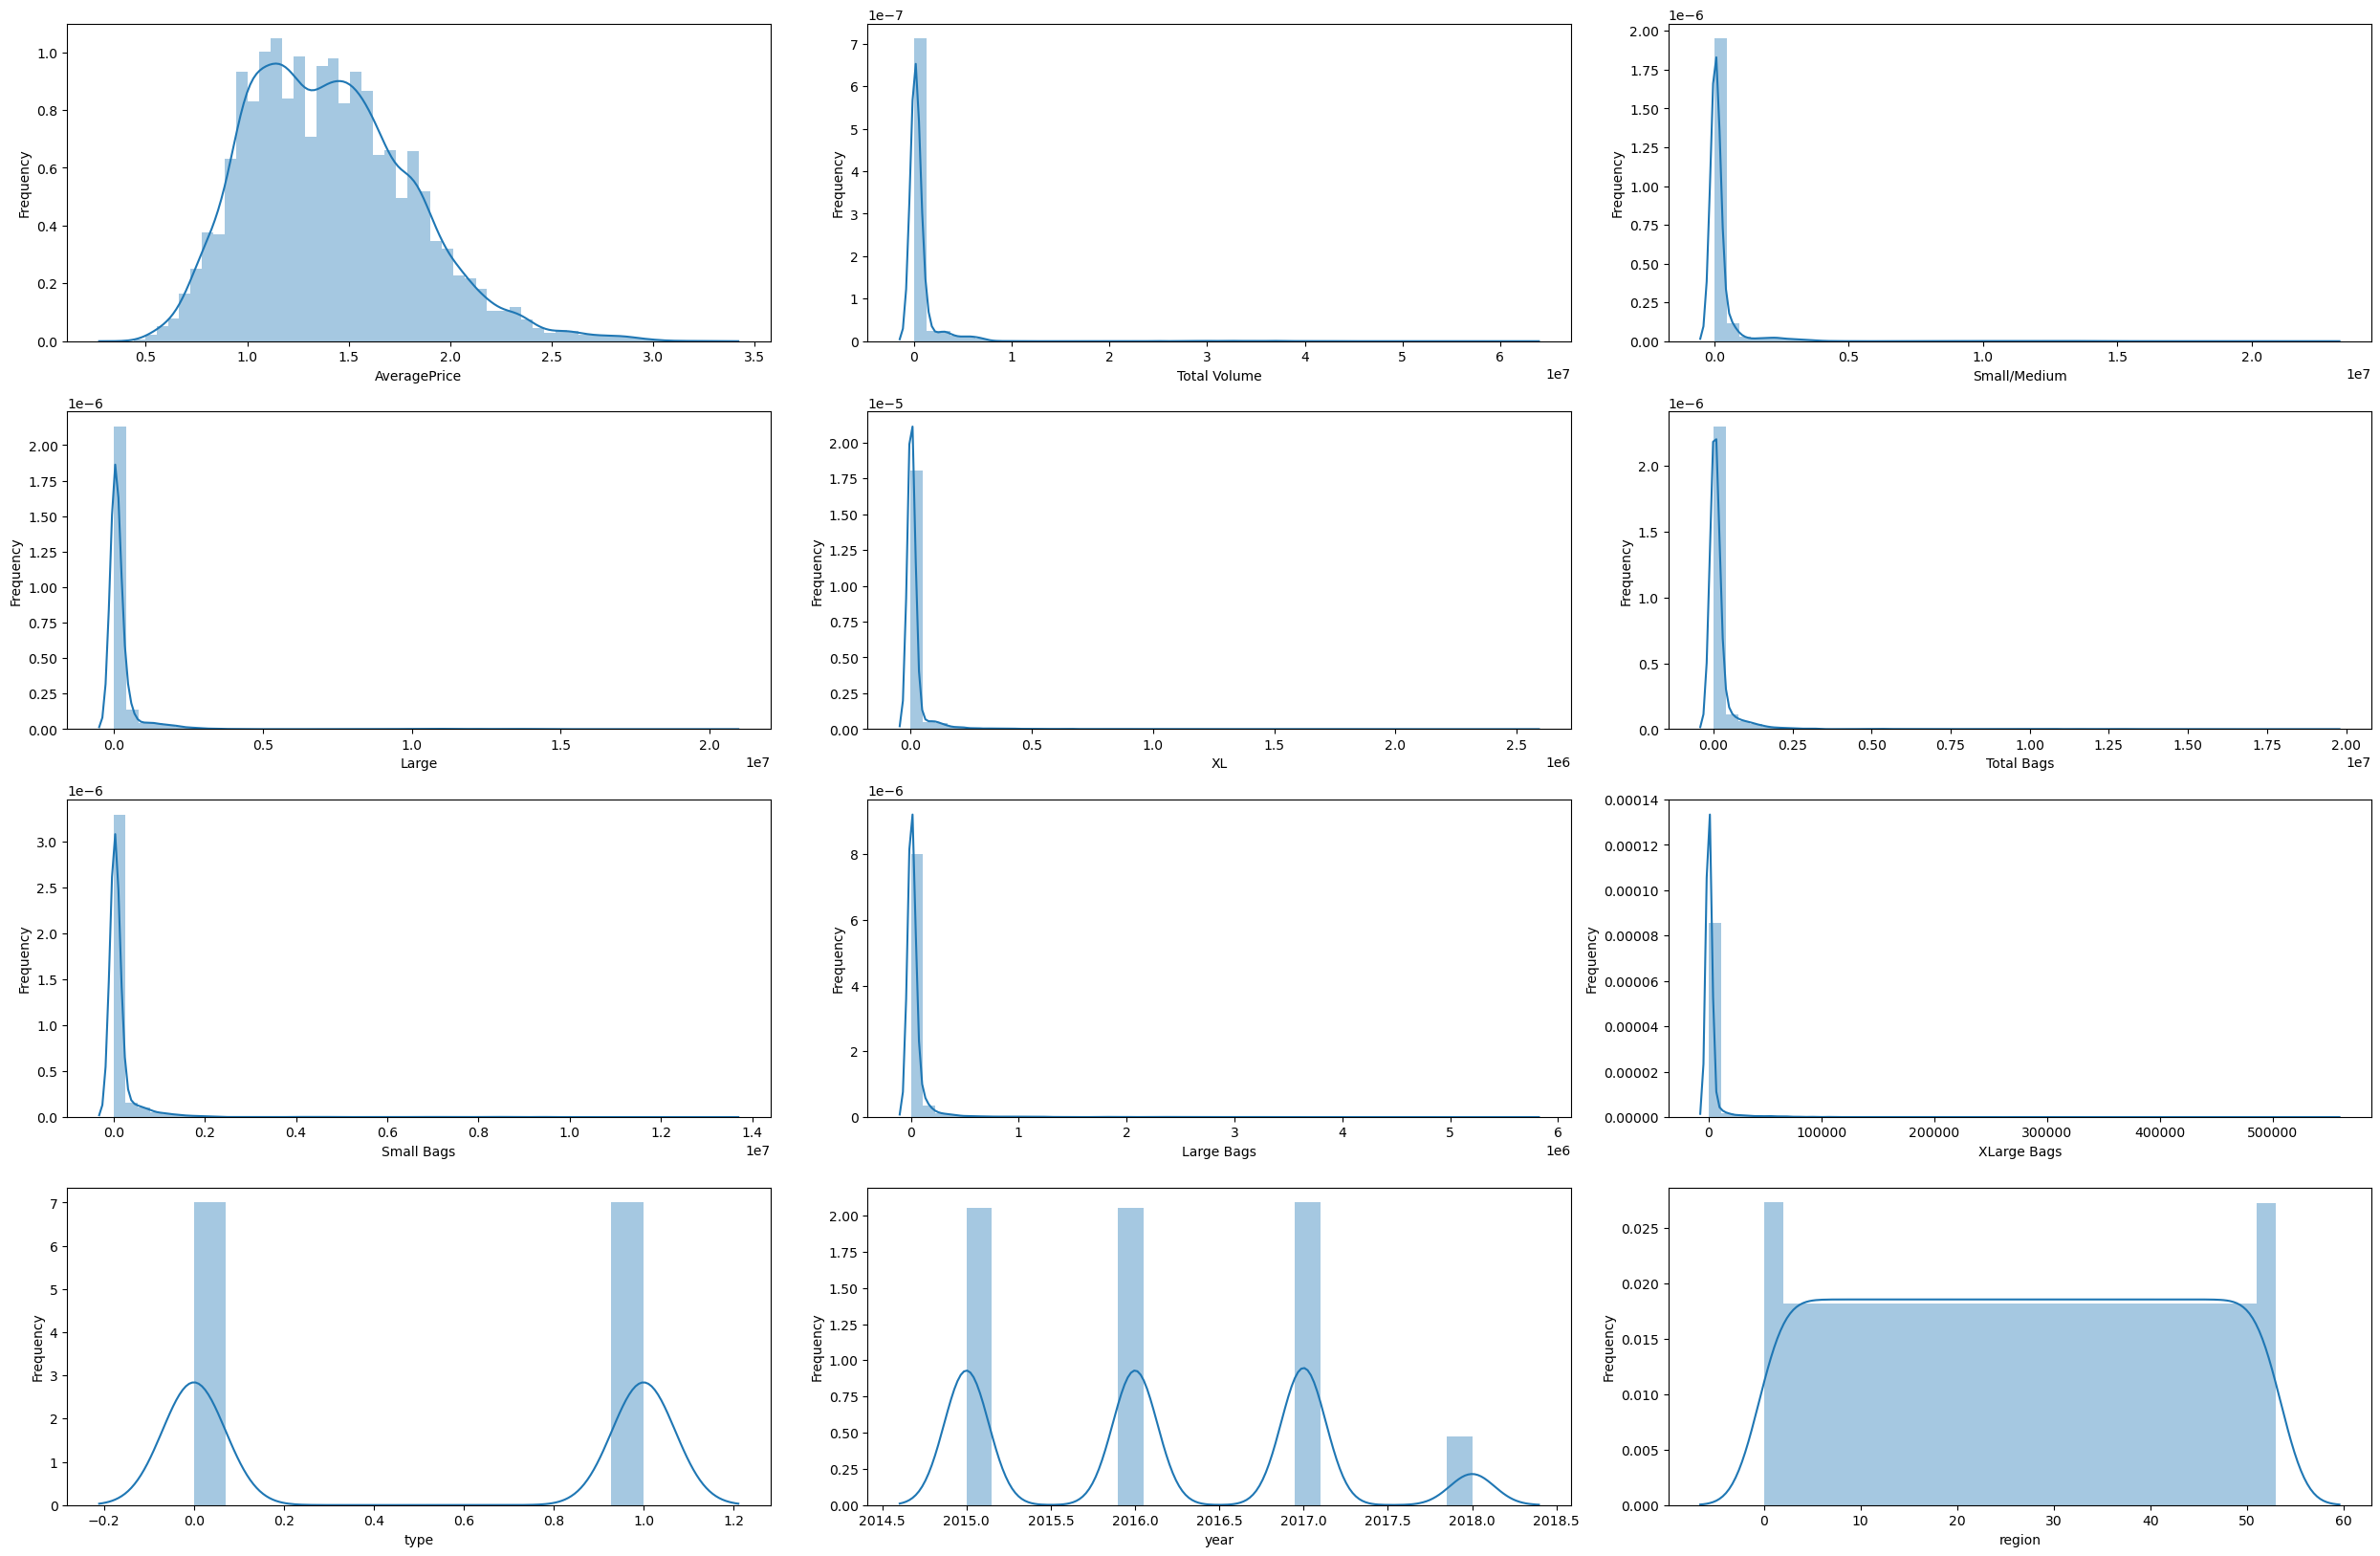

In [136]:
plt.figure(figsize=(25,20))
iterator=1
for i in df.columns[1:]:
    if iterator<=14:
        ax=plt.subplot(5, 3, iterator)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize=10)
        plt.ylabel('Frequency',fontsize=10)
    iterator+=1
plt.tight_layout()

From the Univariate Analysis: <br>
1. Avg. price is almost normally distributed<br>
2. Year is a categorical column and is having data in categorical form<br>
3. Region is also a categorical column which has equal data in almost all the categories<br>
4. All otherfeatures doesn't give a clear indication in univariate analysis<br>

We will go for bivariate analysis to get more insights

## 6.2 Bivariate Analysis

<Axes: >

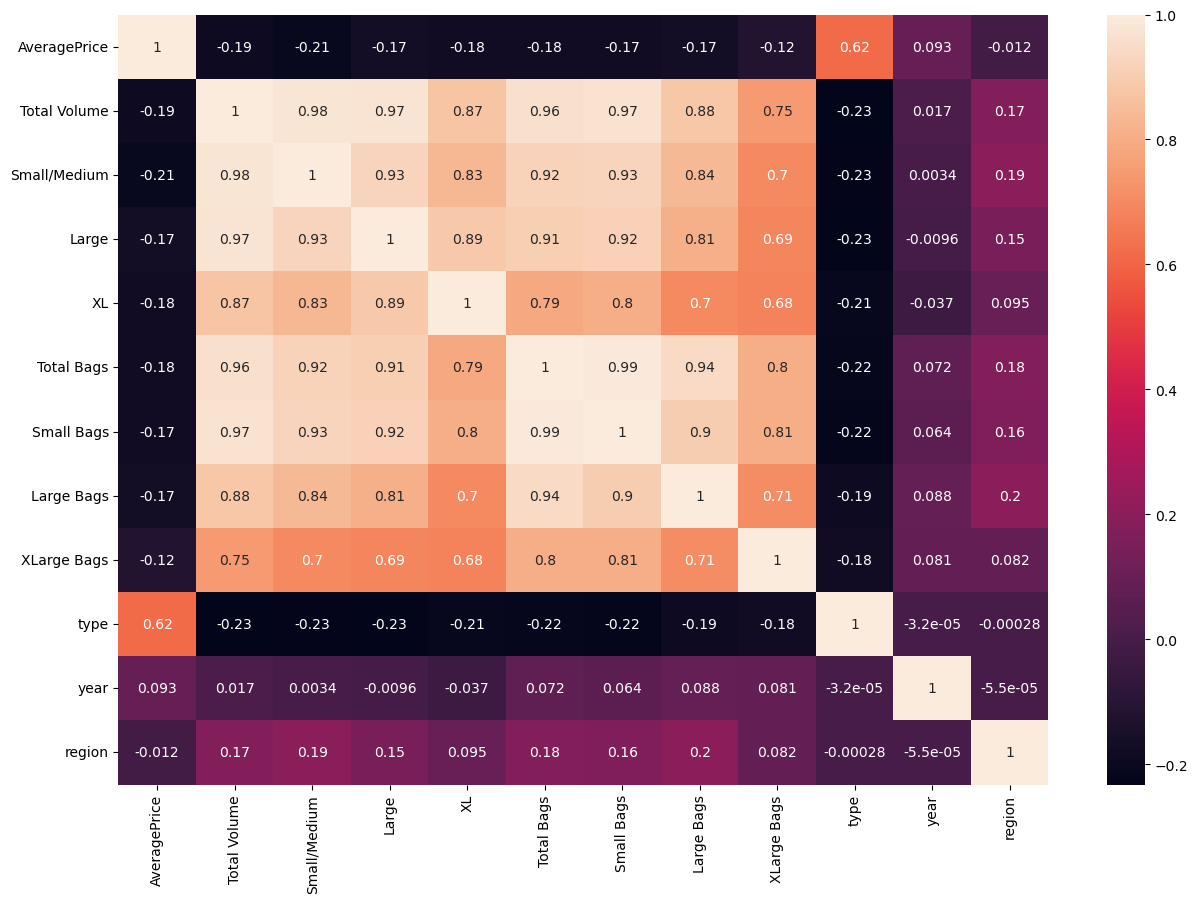

In [137]:
#Checking correlation between among variables
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

We will check the correlation with Target (Region & Average Price):<br>

Correlation with Avg Price:<br>
1. High Correlation : Total Volume, Small/Medium, Large, XL, Total Bags, Small Bags, Large Bags, Xlarge Bags, type<br>
2. Low Correlation : year, region<br><br>

Correlation with type:<br>
1. High Correlation : AveragePrice, Total Volume, Small/Medium, Large, XL, Total Bags, Small Bags, Large Bags,XLarge Bags, year<br>
2. Low Correlation : Average Price, XL, XLarge Bags, type<br>

Correlation among independant Variable:<br>
High Correlation:<br> 
1. Total Volume with Small/Medium, Large, XL, Total Bags, Small Bags, Large Bags, XLarge Bags<br>
2. Small/Medium with Large, XL, Total Bags, Small Bags, Large Bags, XLarge Bags, type<br>
3. Large with XL, Total Bags, Small Bags, Large Bags, XL Bags, type<br>
4. XL with Total Bags, Small Bags, Large Bags, XL Bags, type<br>
5. Total Bags with Small Bags, Large Bags, XLarge Bags, type<br>
6. Small Bags with Large Bags, XLarge Bags, type<br>
7. Large Bags with XLarge bags and type<br>
8. XLarge Bags with type<br>    

## 6.3 Checking and Removal of Outliers

### 6.3.1 Checking for Outliers

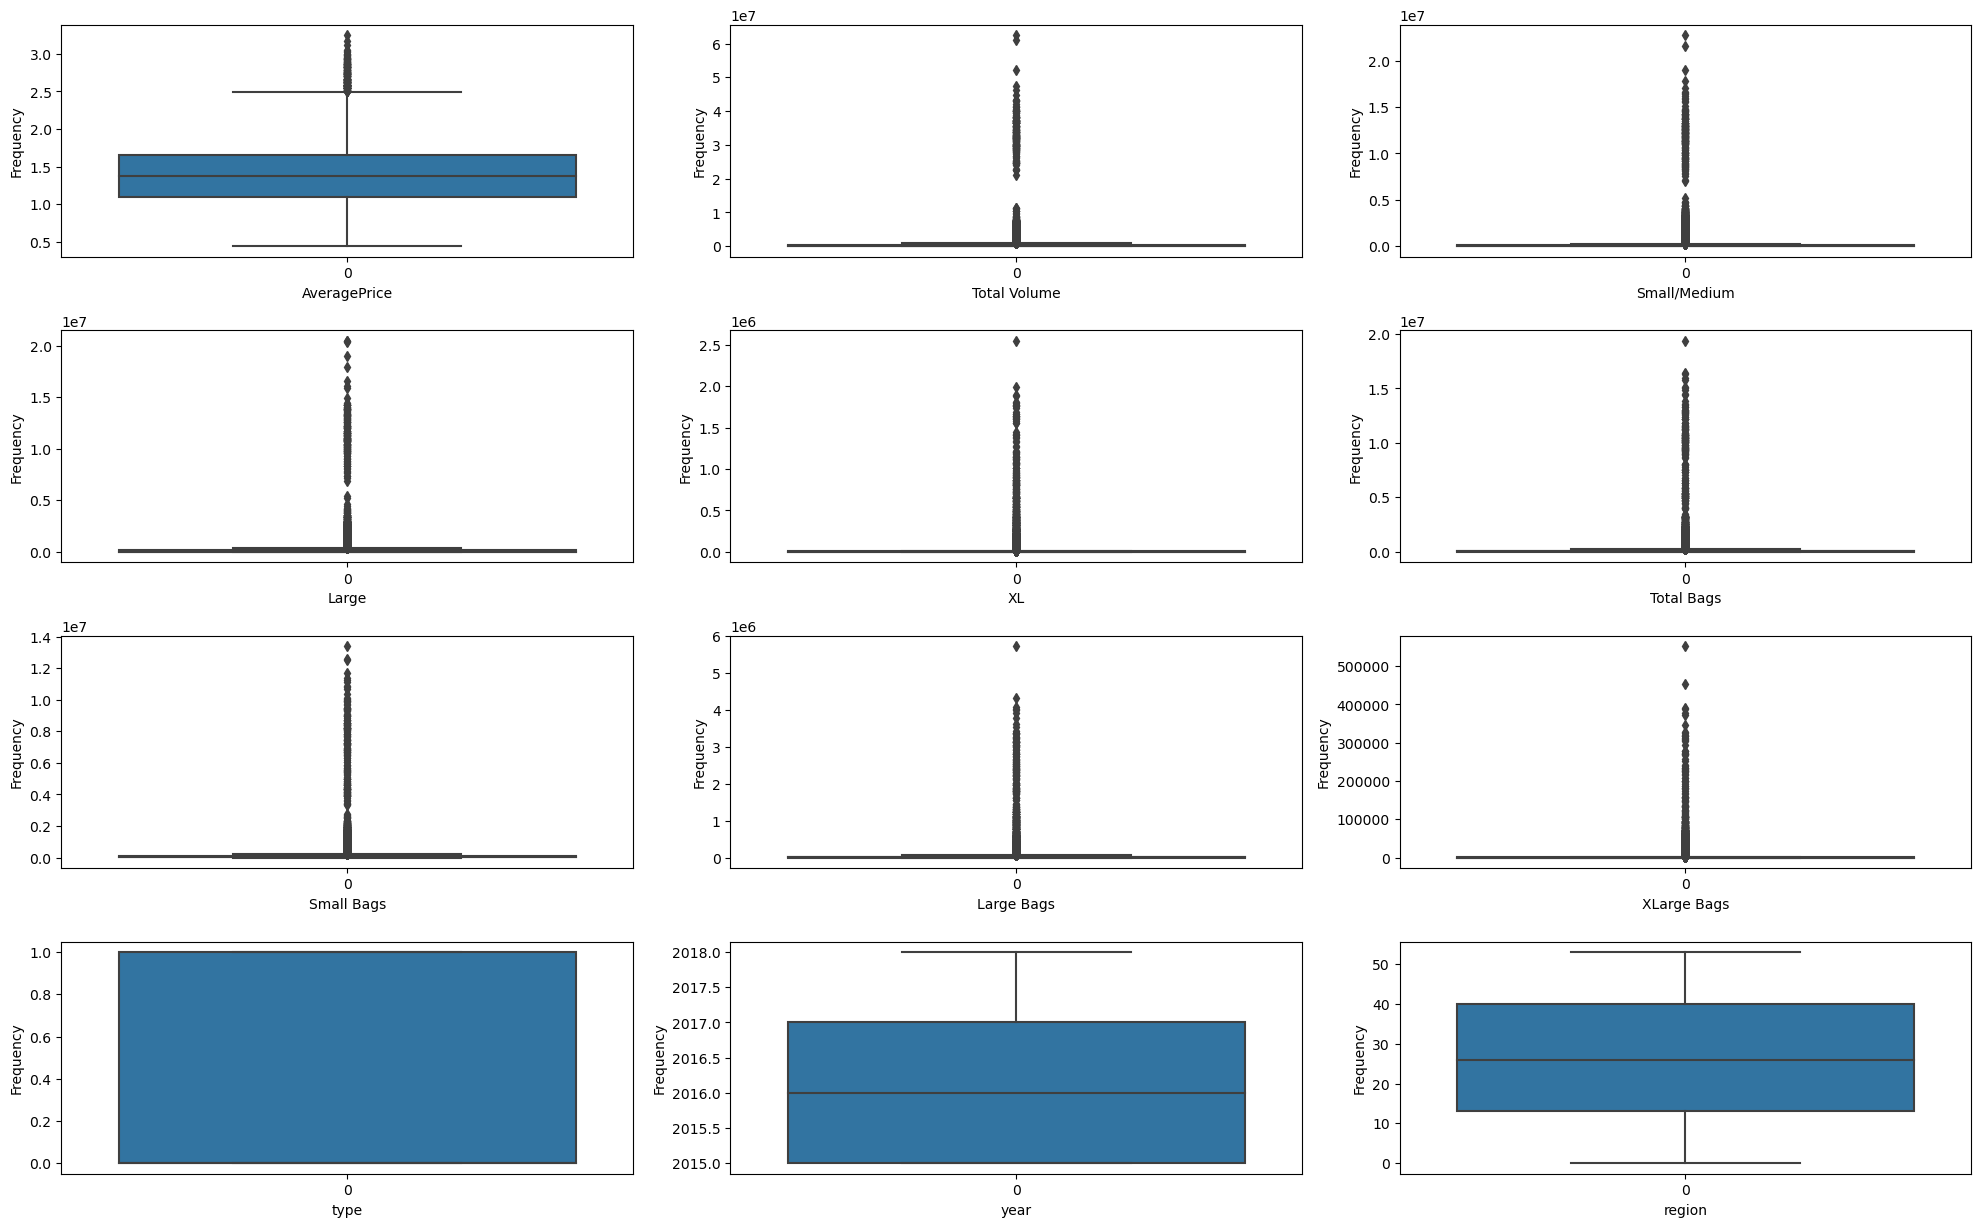

In [138]:
plt.figure(figsize=(20,15))
iterator=1

for i in df.columns[1:]:
    if iterator <=14:
        ax=plt.subplot(5, 3, iterator)
        sns.boxplot(df[i])
        plt.xlabel(i, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
    iterator +=1
plt.tight_layout()

In [139]:
### 6.3.2 Removal of Outliers using Interquantile method

q75,q25=np.percentile(df['AveragePrice'],[75,25])
intr_qr=q75-q25
    
max=q75 + (1.5*intr_qr)
min=q25 - (1.5*intr_qr)
    
df.loc[df['AveragePrice']<min,'AveragePrice']=np.nan
df.loc[df['AveragePrice']>max,'AveragePrice']=np.nan

In [140]:
#Finding null values
df.isnull().sum()

Date              0
AveragePrice    209
Total Volume      0
Small/Medium      0
Large             0
XL                0
Total Bags        0
Small Bags        0
Large Bags        0
XLarge Bags       0
type              0
year              0
region            0
dtype: int64

In [141]:
#Filling the null values with Mean of "AveragePrice"
df['AveragePrice']=df['AveragePrice'].fillna(df['AveragePrice'].mean())

In [142]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
Small/Medium    0
Large           0
XL              0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

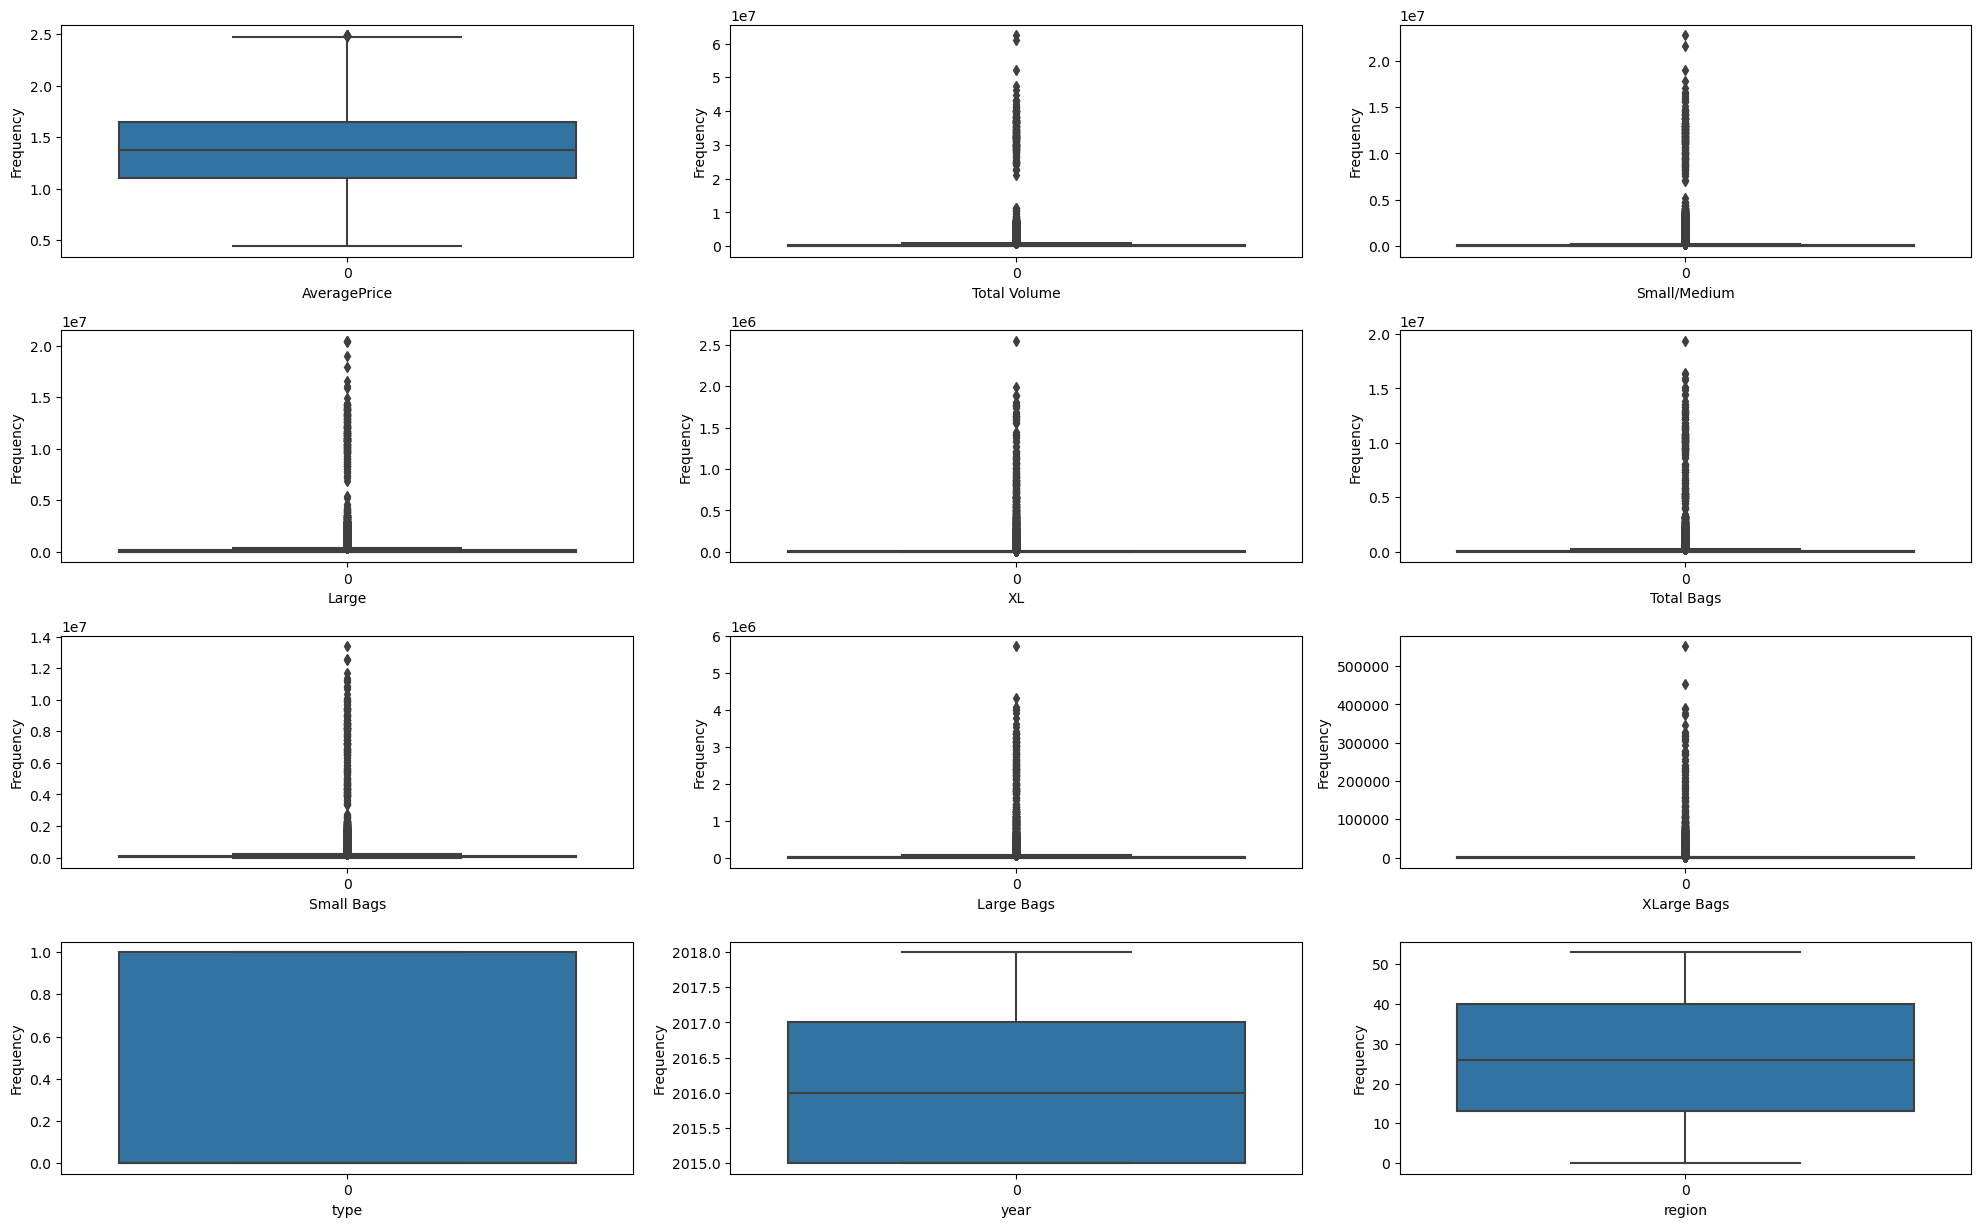

In [143]:
#Checking for the outliers again

plt.figure(figsize=(20,15))
iterator=1

for i in df.columns[1:]:
    if iterator <=14:
        ax=plt.subplot(5, 3, iterator)
        sns.boxplot(df[i])
        plt.xlabel(i, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
    iterator +=1
plt.tight_layout()

# 7. Model Preparation

## 7.1 Model Preparation for Classification type of Avocado

### 7.1.1 Separating Features and Labels

In [144]:
x= df[['AveragePrice','Total Volume','Small/Medium','Large','XL','Total Bags','Small Bags','Large Bags','XLarge Bags','year']]
y= df['type']

### 7.1.2 Modelling

#### Finding best random state model

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

maxRS=0
maxAcc=0

for i in range(1,201):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    predRFC=RFC.predict(x_test)
    acc=accuracy_score(y_test, predRFC)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy is", maxAcc)
print("Best Random State", maxRS)
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

Best Accuracy is 0.9972602739726028
Best Random State 18
[[1795    6]
 [  14 1835]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1801
           1       1.00      0.99      0.99      1849

    accuracy                           0.99      3650
   macro avg       0.99      0.99      0.99      3650
weighted avg       0.99      0.99      0.99      3650



### 7.1.3 Creating Train Test Split

In [177]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=18)

### 7.1.4 Classification Algorithm

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score

Accuracy Score: 93.86301369863014


Confusion matrix:               Predicted organic  Predicted Conventional
organic                    1641                     189
Conventional                 35                    1785


Classification Report:               precision    recall  f1-score   support

           0       0.98      0.90      0.94      1830
           1       0.90      0.98      0.94      1820

    accuracy                           0.94      3650
   macro avg       0.94      0.94      0.94      3650
weighted avg       0.94      0.94      0.94      3650





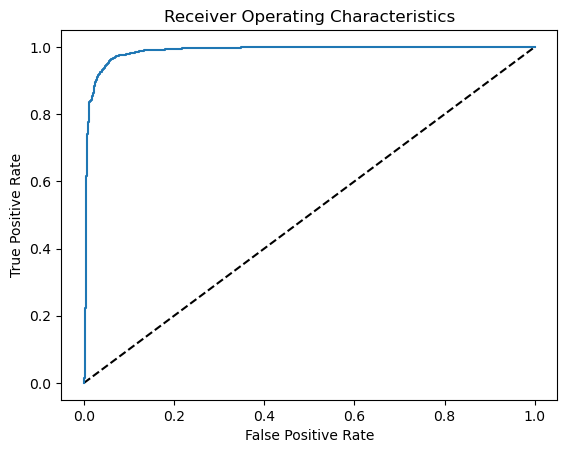

AUC SCORE: 0.9387452711223203
[93.86301369863014]
[93.87452711223203]


In [183]:
acc_scores=[]
AUC_SCORES=[]
# 1. Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)

#Accuracy Score
acc=accuracy_score(y_test,predLR)
print("Accuracy Score:",acc*100)
print("\n")

#Confusion Matrix
CM=pd.DataFrame(confusion_matrix(y_test,predLR))
CM.index=['organic','Conventional']
CM.columns=['Predicted organic','Predicted Conventional']
print("Confusion matrix:", CM)
print("\n")
#Classification Report
CR=classification_report(y_test,predLR)
print("Classification Report:", CR)
print("\n")

#AUC_ROC Curve

y_pred_prob=LR.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

auc_score=roc_auc_score(y_test,predLR)
print("AUC SCORE:", auc_score)

acc_scores.append(acc*100)
print(acc_scores)
AUC_SCORES.append(auc_score*100)
print(AUC_SCORES)

Accuracy Score: 85.72602739726027


Confusion matrix:               Predicted organic  Predicted Conventional
organic                    1469                     361
Conventional                160                    1660


Classification Report:               precision    recall  f1-score   support

           0       0.90      0.80      0.85      1830
           1       0.82      0.91      0.86      1820

    accuracy                           0.86      3650
   macro avg       0.86      0.86      0.86      3650
weighted avg       0.86      0.86      0.86      3650





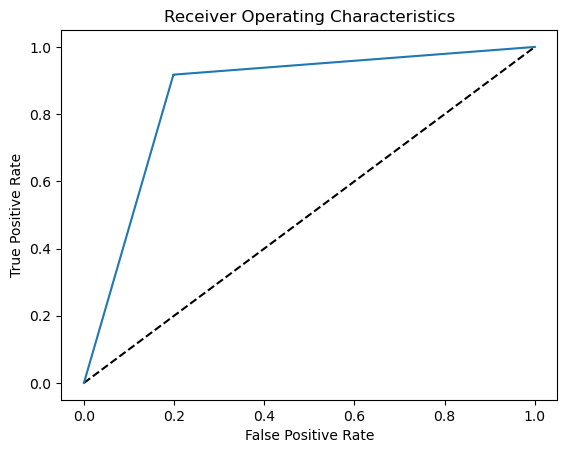

AUC SCORE: 0.8574100762625352
[93.86301369863014, 85.72602739726027]
[93.87452711223203, 85.74100762625352]


In [184]:
# 2. MultinomialNB

mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)

#Accuracy Score
acc=accuracy_score(y_test,predmnb)
print("Accuracy Score:",acc*100)
print("\n")

#Confusion Matrix
CM=pd.DataFrame(confusion_matrix(y_test,predmnb))
CM.index=['organic','Conventional']
CM.columns=['Predicted organic','Predicted Conventional']
print("Confusion matrix:", CM)
print("\n")
#Classification Report
CR=classification_report(y_test,predmnb)
print("Classification Report:", CR)
print("\n")

#AUC_ROC Curve

y_pred_prob=mnb.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Multinomial Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

auc_score=roc_auc_score(y_test,predmnb)
print("AUC SCORE:", auc_score)

acc_scores.append(acc*100)
print(acc_scores)
AUC_SCORES.append(auc_score*100)
print(AUC_SCORES)

Accuracy Score: 85.12328767123287


Confusion matrix:               Predicted organic  Predicted Conventional
organic                    1318                     512
Conventional                 31                    1789


Classification Report:               precision    recall  f1-score   support

           0       0.98      0.72      0.83      1830
           1       0.78      0.98      0.87      1820

    accuracy                           0.85      3650
   macro avg       0.88      0.85      0.85      3650
weighted avg       0.88      0.85      0.85      3650





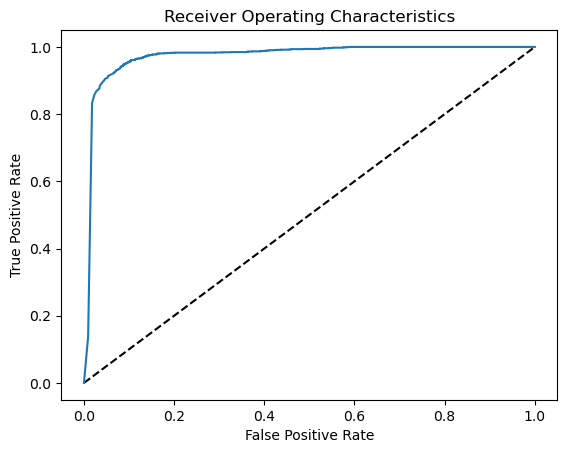

AUC SCORE: 0.8515928061010029
[93.86301369863014, 85.72602739726027, 85.12328767123287]
[93.87452711223203, 85.74100762625352, 85.15928061010028]


In [185]:
# 3. GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)

#Accuracy Score
acc=accuracy_score(y_test,predgnb)
print("Accuracy Score:",acc*100)
print("\n")

#Confusion Matrix
CM=pd.DataFrame(confusion_matrix(y_test, predgnb))
CM.index=['organic','Conventional']
CM.columns=['Predicted organic','Predicted Conventional']
print("Confusion matrix:", CM)
print("\n")
#Classification Report
CR=classification_report(y_test, predgnb)
print("Classification Report:", CR)
print("\n")

#AUC_ROC Curve

y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Gaussian Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

auc_score=roc_auc_score(y_test, predgnb)
print("AUC SCORE:", auc_score)

acc_scores.append(acc*100)
print(acc_scores)
AUC_SCORES.append(auc_score*100)
print(AUC_SCORES)

Accuracy Score: 97.97260273972603


Confusion matrix:               Predicted organic  Predicted Conventional
organic                    1796                      34
Conventional                 40                    1780


Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1830
           1       0.98      0.98      0.98      1820

    accuracy                           0.98      3650
   macro avg       0.98      0.98      0.98      3650
weighted avg       0.98      0.98      0.98      3650





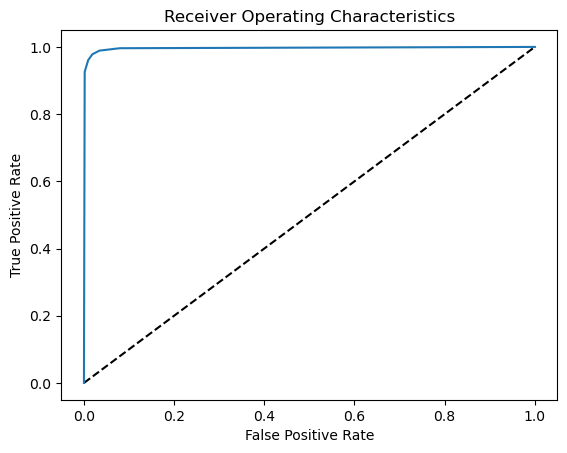

AUC SCORE: 0.9797213715246502
[93.86301369863014, 85.72602739726027, 85.12328767123287, 97.97260273972603]
[93.87452711223203, 85.74100762625352, 85.15928061010028, 97.97213715246502]


In [186]:
# 4. KNeighborsClassifier

KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)

#Accuracy Score
acc=accuracy_score(y_test, predKNN)
print("Accuracy Score:",acc*100)
print("\n")

#Confusion Matrix
CM=pd.DataFrame(confusion_matrix(y_test, predKNN))
CM.index=['organic','Conventional']
CM.columns=['Predicted organic','Predicted Conventional']
print("Confusion matrix:", CM)
print("\n")
#Classification Report
CR=classification_report(y_test, predKNN)
print("Classification Report:", CR)
print("\n")

#AUC_ROC Curve

y_pred_prob=KNN.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNeighbors Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

auc_score=roc_auc_score(y_test, predKNN)
print("AUC SCORE:", auc_score)

acc_scores.append(acc*100)
print(acc_scores)
AUC_SCORES.append(auc_score*100)
print(AUC_SCORES)

Accuracy Score: 98.9041095890411


Confusion matrix:               Predicted organic  Predicted Conventional
organic                    1806                      24
Conventional                 16                    1804


Classification Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1830
           1       0.99      0.99      0.99      1820

    accuracy                           0.99      3650
   macro avg       0.99      0.99      0.99      3650
weighted avg       0.99      0.99      0.99      3650





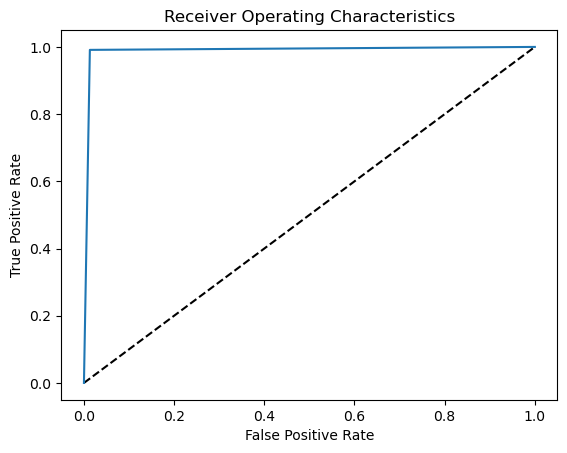

AUC SCORE: 0.9890470185552154
[93.86301369863014, 85.72602739726027, 85.12328767123287, 97.97260273972603, 98.9041095890411]
[93.87452711223203, 85.74100762625352, 85.15928061010028, 97.97213715246502, 98.90470185552154]


In [187]:
# 5. DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)

#Accuracy Score
acc=accuracy_score(y_test, preddtc)
print("Accuracy Score:",acc*100)
print("\n")

#Confusion Matrix
CM=pd.DataFrame(confusion_matrix(y_test, preddtc))
CM.index=['organic','Conventional']
CM.columns=['Predicted organic','Predicted Conventional']
print("Confusion matrix:", CM)
print("\n")
#Classification Report
CR=classification_report(y_test, preddtc)
print("Classification Report:", CR)
print("\n")

#AUC_ROC Curve

y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

auc_score=roc_auc_score(y_test, preddtc)
print("AUC SCORE:", auc_score)

acc_scores.append(acc*100)
print(acc_scores)
AUC_SCORES.append(auc_score*100)
print(AUC_SCORES)

Accuracy Score: 98.9041095890411


Confusion matrix:               Predicted organic  Predicted Conventional
organic                    1806                      24
Conventional                 16                    1804


Classification Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1830
           1       0.99      0.99      0.99      1820

    accuracy                           0.99      3650
   macro avg       0.99      0.99      0.99      3650
weighted avg       0.99      0.99      0.99      3650





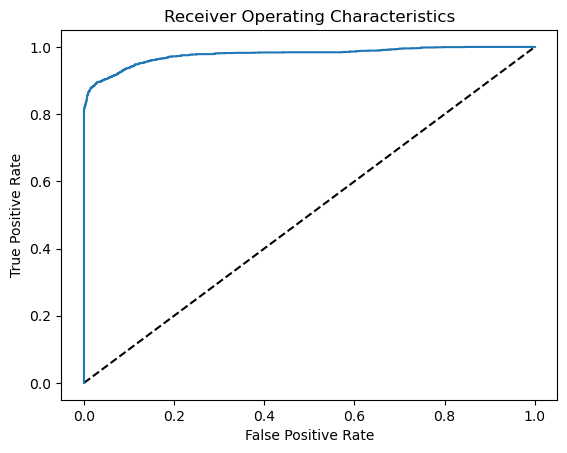

AUC SCORE: 0.9890470185552154
[93.86301369863014, 85.72602739726027, 85.12328767123287, 97.97260273972603, 98.9041095890411, 98.9041095890411]
[93.87452711223203, 85.74100762625352, 85.15928061010028, 97.97213715246502, 98.90470185552154, 98.90470185552154]


In [188]:
# 6. SVC

svc=SVC(probability=True)
svc.fit(x_train,y_train)
predsvc=dtc.predict(x_test)

#Accuracy Score
acc=accuracy_score(y_test, predsvc)
print("Accuracy Score:",acc*100)
print("\n")

#Confusion Matrix
CM=pd.DataFrame(confusion_matrix(y_test, predsvc))
CM.index=['organic','Conventional']
CM.columns=['Predicted organic','Predicted Conventional']
print("Confusion matrix:", CM)
print("\n")
#Classification Report
CR=classification_report(y_test, predsvc)
print("Classification Report:", CR)
print("\n")

#AUC_ROC Curve

y_pred_prob=svc.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

auc_score=roc_auc_score(y_test, predsvc)
print("AUC SCORE:", auc_score)

acc_scores.append(acc*100)
print(acc_scores)
AUC_SCORES.append(auc_score*100)
print(AUC_SCORES)

Accuracy Score: 98.9041095890411


Confusion matrix:               Predicted organic  Predicted Conventional
organic                    1806                      24
Conventional                 16                    1804


Classification Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1830
           1       0.99      0.99      0.99      1820

    accuracy                           0.99      3650
   macro avg       0.99      0.99      0.99      3650
weighted avg       0.99      0.99      0.99      3650





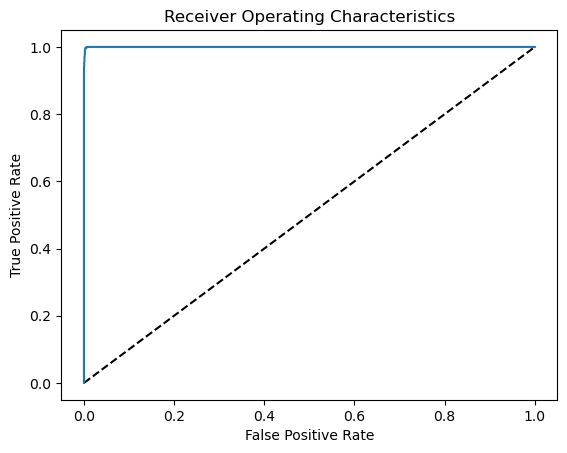

AUC SCORE: 0.9890470185552154
[93.86301369863014, 85.72602739726027, 85.12328767123287, 97.97260273972603, 98.9041095890411, 98.9041095890411, 98.9041095890411]
[93.87452711223203, 85.74100762625352, 85.15928061010028, 97.97213715246502, 98.90470185552154, 98.90470185552154, 98.90470185552154]


In [189]:
# 7. RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=dtc.predict(x_test)

#Accuracy Score
acc=accuracy_score(y_test, predrfc)
print("Accuracy Score:",acc*100)
print("\n")

#Confusion Matrix
CM=pd.DataFrame(confusion_matrix(y_test, predrfc))
CM.index=['organic','Conventional']
CM.columns=['Predicted organic','Predicted Conventional']
print("Confusion matrix:", CM)
print("\n")
#Classification Report
CR=classification_report(y_test, predrfc)
print("Classification Report:", CR)
print("\n")

#AUC_ROC Curve

y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

auc_score=roc_auc_score(y_test, predrfc)
print("AUC SCORE:", auc_score)

acc_scores.append(acc*100)
print(acc_scores)
AUC_SCORES.append(auc_score*100)
print(AUC_SCORES)

Accuracy Score: 98.9041095890411


Confusion matrix:               Predicted organic  Predicted Conventional
organic                    1806                      24
Conventional                 16                    1804


Classification Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1830
           1       0.99      0.99      0.99      1820

    accuracy                           0.99      3650
   macro avg       0.99      0.99      0.99      3650
weighted avg       0.99      0.99      0.99      3650





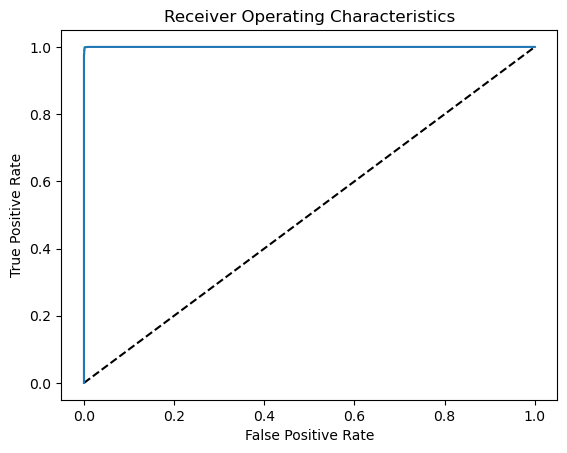

AUC SCORE: 0.9890470185552154
[93.86301369863014, 85.72602739726027, 85.12328767123287, 97.97260273972603, 98.9041095890411, 98.9041095890411, 98.9041095890411, 98.9041095890411]
[93.87452711223203, 85.74100762625352, 85.15928061010028, 97.97213715246502, 98.90470185552154, 98.90470185552154, 98.90470185552154, 98.90470185552154]


In [190]:
# 8. ExtraTreesClassifier

etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=dtc.predict(x_test)

#Accuracy Score
acc=accuracy_score(y_test, predetc)
print("Accuracy Score:",acc*100)
print("\n")

#Confusion Matrix
CM=pd.DataFrame(confusion_matrix(y_test, predetc))
CM.index=['organic','Conventional']
CM.columns=['Predicted organic','Predicted Conventional']
print("Confusion matrix:", CM)
print("\n")
#Classification Report
CR=classification_report(y_test, predetc)
print("Classification Report:", CR)
print("\n")

#AUC_ROC Curve

y_pred_prob=etc.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Extra Trees Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

auc_score=roc_auc_score(y_test, predetc)
print("AUC SCORE:", auc_score)

acc_scores.append(acc*100)
print(acc_scores)
AUC_SCORES.append(auc_score*100)
print(AUC_SCORES)

Accuracy Score: 97.91780821917808


Confusion matrix:               Predicted organic  Predicted Conventional
organic                    1791                      39
Conventional                 37                    1783


Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1830
           1       0.98      0.98      0.98      1820

    accuracy                           0.98      3650
   macro avg       0.98      0.98      0.98      3650
weighted avg       0.98      0.98      0.98      3650





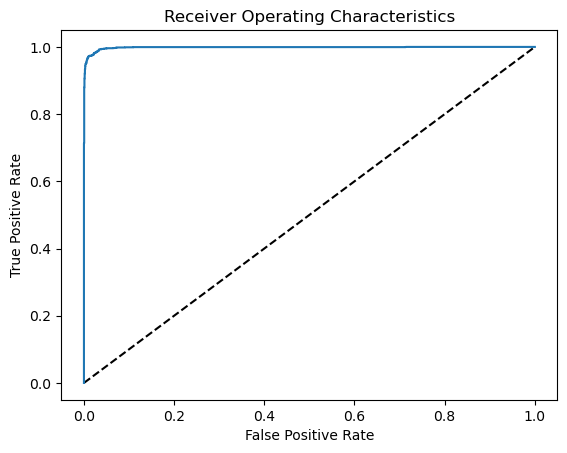

AUC SCORE: 0.979179427130247
[93.86301369863014, 85.72602739726027, 85.12328767123287, 97.97260273972603, 98.9041095890411, 98.9041095890411, 98.9041095890411, 98.9041095890411, 97.91780821917808]
[93.87452711223203, 85.74100762625352, 85.15928061010028, 97.97213715246502, 98.90470185552154, 98.90470185552154, 98.90470185552154, 98.90470185552154, 97.9179427130247]


In [191]:
# 9. AdaBoostClassifier

abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict(x_test)

#Accuracy Score
acc=accuracy_score(y_test, predabc)
print("Accuracy Score:",acc*100)
print("\n")

#Confusion Matrix
CM=pd.DataFrame(confusion_matrix(y_test, predabc))
CM.index=['organic','Conventional']
CM.columns=['Predicted organic','Predicted Conventional']
print("Confusion matrix:", CM)
print("\n")
#Classification Report
CR=classification_report(y_test, predabc)
print("Classification Report:", CR)
print("\n")

#AUC_ROC Curve

y_pred_prob=abc.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='AdaBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

auc_score=roc_auc_score(y_test, predabc)
print("AUC SCORE:", auc_score)

acc_scores.append(acc*100)
print(acc_scores)
AUC_SCORES.append(auc_score*100)
print(AUC_SCORES)

Accuracy Score: 97.91780821917808


Confusion matrix:               Predicted organic  Predicted Conventional
organic                    1791                      39
Conventional                 37                    1783


Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1830
           1       0.98      0.98      0.98      1820

    accuracy                           0.98      3650
   macro avg       0.98      0.98      0.98      3650
weighted avg       0.98      0.98      0.98      3650





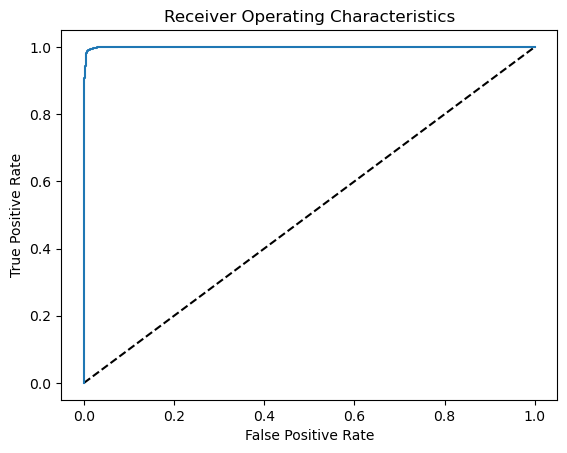

AUC SCORE: 0.979179427130247
[93.86301369863014, 85.72602739726027, 85.12328767123287, 97.97260273972603, 98.9041095890411, 98.9041095890411, 98.9041095890411, 98.9041095890411, 97.91780821917808, 97.91780821917808]
[93.87452711223203, 85.74100762625352, 85.15928061010028, 97.97213715246502, 98.90470185552154, 98.90470185552154, 98.90470185552154, 98.90470185552154, 97.9179427130247, 97.9179427130247]


In [192]:
# 10. GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=abc.predict(x_test)

#Accuracy Score
acc=accuracy_score(y_test, predgbc)
print("Accuracy Score:",acc*100)
print("\n")

#Confusion Matrix
CM=pd.DataFrame(confusion_matrix(y_test, predgbc))
CM.index=['organic','Conventional']
CM.columns=['Predicted organic','Predicted Conventional']
print("Confusion matrix:", CM)
print("\n")
#Classification Report
CR=classification_report(y_test, predgbc)
print("Classification Report:", CR)
print("\n")

#AUC_ROC Curve

y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='GraientBoosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

auc_score=roc_auc_score(y_test, predgbc)
print("AUC SCORE:", auc_score)

acc_scores.append(acc*100)
print(acc_scores)
AUC_SCORES.append(auc_score*100)
print(AUC_SCORES)

In [194]:
# Storing all the values of above models in a DataFrame to find the best performing model
metrics_data = {'Accuracy Scores':acc_scores,
          'AUC Scores': AUC_SCORES,}
row=['LR', 'mnb', 'gnb', 'KNN', 'dtc','svc', 'rfc', 'etc','abc', 'gbc']
metrics=pd.DataFrame(metrics_data, index=row)
print(metrics)

     Accuracy Scores  AUC Scores
LR         93.863014   93.874527
mnb        85.726027   85.741008
gnb        85.123288   85.159281
KNN        97.972603   97.972137
dtc        98.904110   98.904702
svc        98.904110   98.904702
rfc        98.904110   98.904702
etc        98.904110   98.904702
abc        97.917808   97.917943
gbc        97.917808   97.917943


### 7.1.5 Cross Validation Scores

In [198]:
list = [LR, mnb, gnb, KNN, dtc, svc, rfc, etc, abc, gbc]

for i in list:
    scores=cross_val_score(i, x, y, cv=5)
    print(f"Classifier: {i.__class__.__name__}")
    print(f"Cross-validation scores", scores)
    print(f"Mean Score: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")
    print("\n")

Classifier: LogisticRegression
Cross-validation scores [0.9369863  0.92383562 0.93232877 0.93534247 0.92491093]
Mean Score: 0.930680817037507
Standard Deviation: 0.005373158412156268


Classifier: MultinomialNB
Cross-validation scores [0.83835616 0.83013699 0.84739726 0.86164384 0.83228282]
Mean Score: 0.8419634127571074
Standard Deviation: 0.011518995411431858


Classifier: GaussianNB
Cross-validation scores [0.81753425 0.86493151 0.83671233 0.86246575 0.85722116]
Mean Score: 0.8477729984195331
Standard Deviation: 0.01809021657243803


Classifier: KNeighborsClassifier
Cross-validation scores [0.93616438 0.92054795 0.96109589 0.93753425 0.9413538 ]
Mean Score: 0.9393392522627705
Standard Deviation: 0.012991233551374392


Classifier: DecisionTreeClassifier
Cross-validation scores [0.95945205 0.96164384 0.95616438 0.95753425 0.93916141]
Mean Score: 0.9547911869267992
Standard Deviation: 0.008029723876084102


Classifier: SVC
Cross-validation scores [0.89726027 0.88082192 0.92082192 0.886

## RandomForestClassifier is the best model since it is having highest Mean Score.

### 7.1.5 Hyper Parameter Tuning

In [200]:
# Bagging Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : [1,200],
             'criterion':['gini','entropy'],
              'max_depth': [None, 5, 10],
              'max_features':['auto','sqrt'],
              'random_state':[1,50],
              'verbose':[0,1]
             }
rf=RandomForestClassifier()
GCV=GridSearchCV(rf, parameters, cv=5)
GCV.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [1, 200], 'random_state': [1, 50],
                         'verbose': [0, 1]})

In [201]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 200,
 'random_state': 1,
 'verbose': 0}

In [205]:
#Selecting FinalModel with best parameters
FinalModel_Classification=RandomForestClassifier(criterion='entropy', max_depth=None, max_features= 'auto', n_estimators=200,random_state=1, verbose=0)
FinalModel_Classification.fit(x_train,y_train)
pred=FinalModel_Classification.predict(x_test)
acc=accuracy_score(y_test,pred)
print(f"Accuracy Score: {acc*100}")

Accuracy Score: 99.72602739726028


## Accuracy of Final Classification Model is 99.72% for type- Hass Avocado
### We will now find the best Regression model for AveragePrice

## 7.2 Model Preparation for Regression of AveragePrices

### 7.2.1 Separating Features and Labels

In [206]:
df

,Date,AveragePrice,Total Volume,Small/Medium,Large,XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [208]:
x=df[['Total Volume', 'Small/Medium', 'Large', 'XL', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type']]
y=df['AveragePrice']

### 7.2.2 Modelling

#### Finding the best random state model

In [240]:
#Importing Train_Test_Model and LinearRegression
#Importing metrics

from sklearn.linear_model import LinearRegression
maxScore=0

# 1.Splitting the features(x), in training and testing set with 80% data being sent to training.
# 2. Applying Standard Scaler on training set only.

for i in range(201):
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    mscore=LR.score(x_test,y_test)
    if mscore>maxScore:
        maxScore=mscore
        randomState=i
    
print('Best Score = {} For Random state = {}'.format(maxScore*100,randomState))

Best Score = 44.01115195328094 For Random state = 113


### 7.2.3 Creating Train Test Model

In [241]:
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=113)

### 7.2.4 Regression Algorithms

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [243]:
r2_Score=[]
Mean_Absolute_Error=[]
Mean_Squared_Error=[]

#1. LinearRegression (with best random_state)

x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=113)
LR = LinearRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
r2 = r2_score(y_test, predLR)
mae = mean_absolute_error(y_test, predLR)
mse = mean_squared_error(y_test, predLR)

print('R2 SCore:', r2)
print('Mean Absolute Error:', mae)
print('Mean Sqaured Error:', mse)

#Appending the values in their respective rows

r2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

print(r2_Score)
print(Mean_Absolute_Error)
print(Mean_Squared_Error)

R2 SCore: 0.44011151953280936
Mean Absolute Error: 0.22702464807349299
Mean Sqaured Error: 0.08292220520163436
[0.44011151953280936]
[0.22702464807349299]
[0.08292220520163436]


In [244]:
# 2.ElasticNet 

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=113)
EN = ElasticNet(alpha=1.0, l1_ratio=0.5)
EN.fit(x_train,y_train)
predEN = EN.predict(x_test)
r2 = r2_score(y_test, predEN)
mae = mean_absolute_error(y_test, predEN)
mse = mean_squared_error(y_test, predEN)

print('R2 SCore:', r2)
print('Mean Absolute Error:', mae)
print('Mean Sqaured Error:', mse)

#Appending the values in their respective rows

r2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

print(r2_Score)
print(Mean_Absolute_Error)
print(Mean_Squared_Error)

R2 SCore: 0.052954417184185365
Mean Absolute Error: 0.30755461811724827
Mean Sqaured Error: 0.14026205377189627
[0.44011151953280936, 0.052954417184185365]
[0.22702464807349299, 0.30755461811724827]
[0.08292220520163436, 0.14026205377189627]


In [245]:
# 3.Lasso

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=113)
lasso = Lasso(alpha=1.0)
lasso.fit(x_train,y_train)
predlasso = lasso.predict(x_test)
r2 = r2_score(y_test, predlasso)
mae = mean_absolute_error(y_test, predlasso)
mse = mean_squared_error(y_test, predlasso)

print('R2 SCore:', r2)
print('Mean Absolute Error:', mae)
print('Mean Sqaured Error:', mse)

#Appending the values in their respective rows

r2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

print(r2_Score)
print(Mean_Absolute_Error)
print(Mean_Squared_Error)

R2 SCore: 0.052958989625710884
Mean Absolute Error: 0.3075552706527302
Mean Sqaured Error: 0.14026137657108276
[0.44011151953280936, 0.052954417184185365, 0.052958989625710884]
[0.22702464807349299, 0.30755461811724827, 0.3075552706527302]
[0.08292220520163436, 0.14026205377189627, 0.14026137657108276]


In [246]:
# 4.Ridge

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=113)
ridge = Ridge(alpha=1.0)
ridge.fit(x_train,y_train)
predridge = ridge.predict(x_test)
r2 = r2_score(y_test, predridge)
mae = mean_absolute_error(y_test, predridge)
mse = mean_squared_error(y_test, predridge)

print('R2 SCore:', r2)
print('Mean Absolute Error:', mae)
print('Mean Sqaured Error:', mse)

#Appending the values in their respective rows

r2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

print(r2_Score)
print(Mean_Absolute_Error)
print(Mean_Squared_Error)

R2 SCore: 0.4401276880913779
Mean Absolute Error: 0.2270177796179637
Mean Sqaured Error: 0.08291981055952578
[0.44011151953280936, 0.052954417184185365, 0.052958989625710884, 0.4401276880913779]
[0.22702464807349299, 0.30755461811724827, 0.3075552706527302, 0.2270177796179637]
[0.08292220520163436, 0.14026205377189627, 0.14026137657108276, 0.08291981055952578]


In [248]:
# 5.KNeighborRegressor

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=113)
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
predknr = knr.predict(x_test)
r2 = r2_score(y_test, predknr)
mae = mean_absolute_error(y_test, predknr)
mse = mean_squared_error(y_test, predknr)

print('R2 SCore:', r2)
print('Mean Absolute Error:', mae)
print('Mean Sqaured Error:', mse)

#Appending the values in their respective rows

r2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

print(r2_Score)
print(Mean_Absolute_Error)
print(Mean_Squared_Error)

R2 SCore: 0.6721629612604665
Mean Absolute Error: 0.15991355562980286
Mean Sqaured Error: 0.04855425883449444
[0.44011151953280936, 0.052954417184185365, 0.052958989625710884, 0.4401276880913779, 0.6721629612604665]
[0.22702464807349299, 0.30755461811724827, 0.3075552706527302, 0.2270177796179637, 0.15991355562980286]
[0.08292220520163436, 0.14026205377189627, 0.14026137657108276, 0.08291981055952578, 0.04855425883449444]


In [249]:
# 6.DecisionTreeRegressor

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=113)
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr = dtr.predict(x_test)
r2 = r2_score(y_test, preddtr)
mae = mean_absolute_error(y_test, preddtr)
mse = mean_squared_error(y_test, preddtr)

print('R2 SCore:', r2)
print('Mean Absolute Error:', mae)
print('Mean Sqaured Error:', mse)

#Appending the values in their respective rows

r2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

print(r2_Score)
print(Mean_Absolute_Error)
print(Mean_Squared_Error)

R2 SCore: 0.5382883650874459
Mean Absolute Error: 0.1728504741366218
Mean Sqaured Error: 0.06838173720283294
[0.44011151953280936, 0.052954417184185365, 0.052958989625710884, 0.4401276880913779, 0.6721629612604665, 0.5382883650874459]
[0.22702464807349299, 0.30755461811724827, 0.3075552706527302, 0.2270177796179637, 0.15991355562980286, 0.1728504741366218]
[0.08292220520163436, 0.14026205377189627, 0.14026137657108276, 0.08291981055952578, 0.04855425883449444, 0.06838173720283294]


In [250]:
# 7.SVR

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=113)
svr = SVR()
svr.fit(x_train,y_train)
predsvr = svr.predict(x_test)
r2 = r2_score(y_test, predsvr)
mae = mean_absolute_error(y_test, predsvr)
mse = mean_squared_error(y_test, predsvr)

print('R2 SCore:', r2)
print('Mean Absolute Error:', mae)
print('Mean Sqaured Error:', mse)

#Appending the values in their respective rows

r2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

print(r2_Score)
print(Mean_Absolute_Error)
print(Mean_Squared_Error)

R2 SCore: 0.38915120292972505
Mean Absolute Error: 0.23521921468376203
Mean Sqaured Error: 0.09046967577465831
[0.44011151953280936, 0.052954417184185365, 0.052958989625710884, 0.4401276880913779, 0.6721629612604665, 0.5382883650874459, 0.38915120292972505]
[0.22702464807349299, 0.30755461811724827, 0.3075552706527302, 0.2270177796179637, 0.15991355562980286, 0.1728504741366218, 0.23521921468376203]
[0.08292220520163436, 0.14026205377189627, 0.14026137657108276, 0.08291981055952578, 0.04855425883449444, 0.06838173720283294, 0.09046967577465831]


In [251]:
# 8.RandomForestRegressor

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=113)
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr = rfr.predict(x_test)
r2 = r2_score(y_test, predrfr)
mae = mean_absolute_error(y_test, predrfr)
mse = mean_squared_error(y_test, predrfr)

print('R2 SCore:', r2)
print('Mean Absolute Error:', mae)
print('Mean Sqaured Error:', mse)

#Appending the values in their respective rows

r2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

print(r2_Score)
print(Mean_Absolute_Error)
print(Mean_Squared_Error)

R2 SCore: 0.7783350368808813
Mean Absolute Error: 0.12851923152811104
Mean Sqaured Error: 0.03282965840347092
[0.44011151953280936, 0.052954417184185365, 0.052958989625710884, 0.4401276880913779, 0.6721629612604665, 0.5382883650874459, 0.38915120292972505, 0.7783350368808813]
[0.22702464807349299, 0.30755461811724827, 0.3075552706527302, 0.2270177796179637, 0.15991355562980286, 0.1728504741366218, 0.23521921468376203, 0.12851923152811104]
[0.08292220520163436, 0.14026205377189627, 0.14026137657108276, 0.08291981055952578, 0.04855425883449444, 0.06838173720283294, 0.09046967577465831, 0.03282965840347092]


In [252]:
# 9.ExtraTreesRegressor

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=113)
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
predetr = etr.predict(x_test)
r2 = r2_score(y_test, predetr)
mae = mean_absolute_error(y_test, predetr)
mse = mean_squared_error(y_test, predetr)

print('R2 SCore:', r2)
print('Mean Absolute Error:', mae)
print('Mean Sqaured Error:', mse)

#Appending the values in their respective rows

r2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

print(r2_Score)
print(Mean_Absolute_Error)
print(Mean_Squared_Error)

R2 SCore: 0.7906381438239215
Mean Absolute Error: 0.12319525464872583
Mean Sqaured Error: 0.03100750846801032
[0.44011151953280936, 0.052954417184185365, 0.052958989625710884, 0.4401276880913779, 0.6721629612604665, 0.5382883650874459, 0.38915120292972505, 0.7783350368808813, 0.7906381438239215]
[0.22702464807349299, 0.30755461811724827, 0.3075552706527302, 0.2270177796179637, 0.15991355562980286, 0.1728504741366218, 0.23521921468376203, 0.12851923152811104, 0.12319525464872583]
[0.08292220520163436, 0.14026205377189627, 0.14026137657108276, 0.08291981055952578, 0.04855425883449444, 0.06838173720283294, 0.09046967577465831, 0.03282965840347092, 0.03100750846801032]


In [253]:
# 10.GradientBoostingRegressor

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=113)
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr = gbr.predict(x_test)
r2 = r2_score(y_test, predgbr)
mae = mean_absolute_error(y_test, predgbr)
mse = mean_squared_error(y_test, predgbr)

print('R2 SCore:', r2)
print('Mean Absolute Error:', mae)
print('Mean Sqaured Error:', mse)

#Appending the values in their respective rows

r2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

print(r2_Score)
print(Mean_Absolute_Error)
print(Mean_Squared_Error)

R2 SCore: 0.6376999997708708
Mean Absolute Error: 0.17917377122337813
Mean Sqaured Error: 0.05365839093257167
[0.44011151953280936, 0.052954417184185365, 0.052958989625710884, 0.4401276880913779, 0.6721629612604665, 0.5382883650874459, 0.38915120292972505, 0.7783350368808813, 0.7906381438239215, 0.6376999997708708]
[0.22702464807349299, 0.30755461811724827, 0.3075552706527302, 0.2270177796179637, 0.15991355562980286, 0.1728504741366218, 0.23521921468376203, 0.12851923152811104, 0.12319525464872583, 0.17917377122337813]
[0.08292220520163436, 0.14026205377189627, 0.14026137657108276, 0.08291981055952578, 0.04855425883449444, 0.06838173720283294, 0.09046967577465831, 0.03282965840347092, 0.03100750846801032, 0.05365839093257167]


In [254]:
# 11.AdaBoostRegressor

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=113)
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
predabr = abr.predict(x_test)
r2 = r2_score(y_test, predabr)
mae = mean_absolute_error(y_test, predabr)
mse = mean_squared_error(y_test, predabr)

print('R2 SCore:', r2)
print('Mean Absolute Error:', mae)
print('Mean Sqaured Error:', mse)

#Appending the values in their respective rows

r2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

print(r2_Score)
print(Mean_Absolute_Error)
print(Mean_Squared_Error)

R2 SCore: 0.49653018444928254
Mean Absolute Error: 0.22545276746180973
Mean Sqaured Error: 0.07456632671400724
[0.44011151953280936, 0.052954417184185365, 0.052958989625710884, 0.4401276880913779, 0.6721629612604665, 0.5382883650874459, 0.38915120292972505, 0.7783350368808813, 0.7906381438239215, 0.6376999997708708, 0.49653018444928254]
[0.22702464807349299, 0.30755461811724827, 0.3075552706527302, 0.2270177796179637, 0.15991355562980286, 0.1728504741366218, 0.23521921468376203, 0.12851923152811104, 0.12319525464872583, 0.17917377122337813, 0.22545276746180973]
[0.08292220520163436, 0.14026205377189627, 0.14026137657108276, 0.08291981055952578, 0.04855425883449444, 0.06838173720283294, 0.09046967577465831, 0.03282965840347092, 0.03100750846801032, 0.05365839093257167, 0.07456632671400724]


In [255]:
# 12.XGBoostRegression
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=113)
xgbr = xgb.XGBRegressor(n_estimators=100)
xgbr.fit(x_train,y_train)
predxgbr = xgbr.predict(x_test)
r2 = r2_score(y_test, predxgbr)
mae = mean_absolute_error(y_test, predxgbr)
mse = mean_squared_error(y_test, predxgbr)

print('R2 SCore:', r2)
print('Mean Absolute Error:', mae)
print('Mean Sqaured Error:', mse)

#Appending the values in their respective rows

r2_Score.append(r2)
Mean_Absolute_Error.append(mae)
Mean_Squared_Error.append(mse)

print(r2_Score)
print(Mean_Absolute_Error)
print(Mean_Squared_Error)

R2 SCore: 0.7363237149342674
Mean Absolute Error: 0.1461560282246483
Mean Sqaured Error: 0.03905173937277779
[0.44011151953280936, 0.052954417184185365, 0.052958989625710884, 0.4401276880913779, 0.6721629612604665, 0.5382883650874459, 0.38915120292972505, 0.7783350368808813, 0.7906381438239215, 0.6376999997708708, 0.49653018444928254, 0.7363237149342674]
[0.22702464807349299, 0.30755461811724827, 0.3075552706527302, 0.2270177796179637, 0.15991355562980286, 0.1728504741366218, 0.23521921468376203, 0.12851923152811104, 0.12319525464872583, 0.17917377122337813, 0.22545276746180973, 0.1461560282246483]
[0.08292220520163436, 0.14026205377189627, 0.14026137657108276, 0.08291981055952578, 0.04855425883449444, 0.06838173720283294, 0.09046967577465831, 0.03282965840347092, 0.03100750846801032, 0.05365839093257167, 0.07456632671400724, 0.03905173937277779]


In [256]:
# Storing all the values of above models in a DataFrame to find the best performing model
metrics_data = {'r2 Score':r2_Score,
          'Mean Absolute Error': Mean_Absolute_Error,
          'Mean Squared Error': Mean_Squared_Error}
row=['LR','EN', 'Lasso', 'Ridge', 'knr', 'dtr', 'svr', 'rfr', 'etr', 'gbr','abr','xgbr']
metrics=pd.DataFrame(metrics_data, index=row)
print(metrics)

       r2 Score  Mean Absolute Error  Mean Squared Error
LR     0.440112             0.227025            0.082922
EN     0.052954             0.307555            0.140262
Lasso  0.052959             0.307555            0.140261
Ridge  0.440128             0.227018            0.082920
knr    0.672163             0.159914            0.048554
dtr    0.538288             0.172850            0.068382
svr    0.389151             0.235219            0.090470
rfr    0.778335             0.128519            0.032830
etr    0.790638             0.123195            0.031008
gbr    0.637700             0.179174            0.053658
abr    0.496530             0.225453            0.074566
xgbr   0.736324             0.146156            0.039052


## ExtraTreesRegressor is the best model, since it is having the highest R2 score

### 7.2.5 Hyper Parameter Tuning

In [260]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : [1,100],
              'max_depth': [None, 5],
              'max_features':['auto','sqrt'],
              'random_state':[1,100],
             }
etr=ExtraTreesRegressor()
GCV=GridSearchCV(etr, parameters, cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 5],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [1, 100], 'random_state': [1, 100]})

In [261]:
GCV.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 100,
 'random_state': 100}

In [268]:
FinalModel_Regression=ExtraTreesRegressor(max_depth=None, max_features='auto', n_estimators=100, random_state=100)
FinalModel_Regression.fit(x_train,y_train)
pred=FinalModel2.predict(x_test)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Mean Squared Error :{mse}")
print(f"Mean Absolute Error : {mae}")
print(f"r2_Score: {r2*100}")

Mean Squared Error :0.031238190210934786
Mean Absolute Error : 0.12322891759560187
r2_Score: 78.9080586952352


In [270]:
# 8. Saving Final Models of Regression and Classification

import joblib
joblib.dump(FinalModel_Regression, "Avocado_Predict_AveragePrice.pkl")

['Avocado_Predict_AveragePrice.pkl']

In [271]:
import joblib
joblib.dump(FinalModel_Classification, "Avocado_Predict_type.pkl")

['Avocado_Predict_type.pkl']